In [23]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt
import math

In [24]:
m = mp.Model()

A = m.add_var(name='Radio', var_type=mp.CONTINUOUS, lb=1)
B = m.add_var(name='TV', var_type=mp.CONTINUOUS, lb=1)

m.objective = mp.maximize(5000 * (A - 1) + 4500 * (B - 1) + 2000 + 3000)

m += A * 300 + B * 2000 <= 20000
m += A * 300 <= 20000 * 0.8
m += B * 2000 <= 20000 * 0.8
m += A >= 1
m += B >= 1

m.optimize()

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 1 (-4) rows, 2 (0) columns and 2 (-4) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp0000I Optimal - objective value 9500
Clp0000I Optimal - objective value 9500
Coin0511I After Postsolve, objective 9500, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 9500 Dual inf 37833.333 (2)
Clp0000I Optimal - objective value 275666.67
Clp0000I Optimal - objective value 275666.67
Clp0000I Optimal - objective value 275666.67
Coin0511I After Postsolve, objective 275666.67, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 275666.6667 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [25]:
print(f"Comerciais de rádio: {A.x:.0f}")
print(f"Comerciais de TV: {B.x:.0f}")
print(f"Max return: {math.floor(m.objective_value)}")

Comerciais de rádio: 53
Comerciais de TV: 2
Max return: 271166


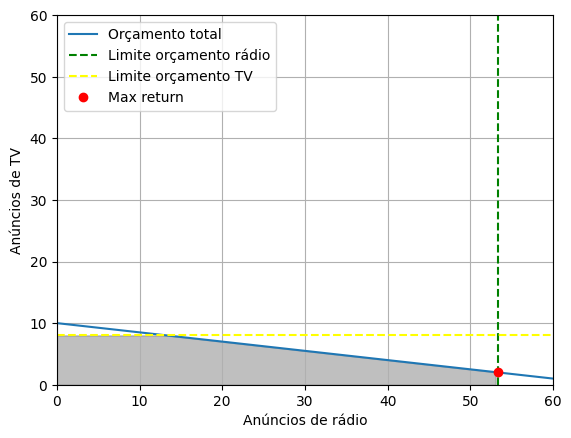

In [26]:
x = np.linspace(0, 60, 200)

r1 = (20000 - 300 * x) / 2000
plt.plot(x, r1, label="Orçamento total")

r2 = 20000 * 0.8 / 300
plt.axvline(r2, color='green', linestyle='--', label="Limite orçamento rádio")

r3 = 20000 * 0.8 / 2000
plt.axhline(r3, color='yellow', linestyle='--', label="Limite orçamento TV")

plt.xlim(0, 60)
plt.ylim(0, 60)

plt.xlabel("Anúncios de rádio")
plt.ylabel("Anúncios de TV")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(r1, r3), where=(x <= r2), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()